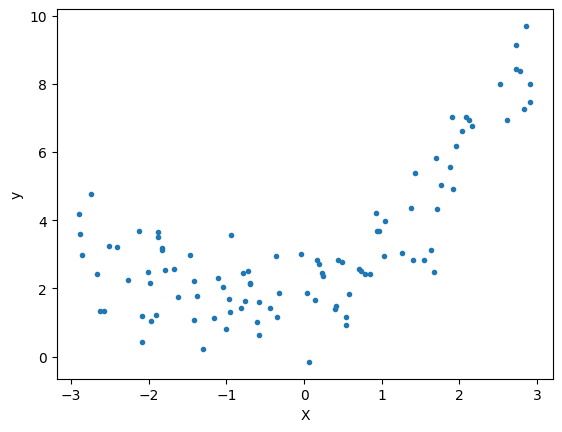

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples
m = 100  

# Generate random input values (features) in the range [-3, 3]
X = 6 * np.random.rand(m, 1) - 3  

# Compute the target values using a quadratic equation with some Gaussian noise
# y = 0.5 * X^2 + X + 2 + noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  

# Plot the generated dataset
plt.plot(X, y, ".")  # Scatter plot of X vs. y
plt.xlabel('X')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.show()  # Display the plot

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial feature transformer with degree 2 (quadratic features)
# Setting include_bias=False means no additional bias (intercept) term is added
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original feature matrix X to include polynomial terms (X and X^2)
X_poly = poly_features.fit_transform(X)

# Display the first transformed sample to observe the new feature representation
X[0]

array([-0.94568476])

In [3]:
# Display the first transformed sample to observe the polynomial features
X_poly[0]

array([-0.94568476,  0.89431967])

In [4]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lin_reg = LinearRegression()

# Train the model using the polynomial features and target values
lin_reg.fit(X_poly, y)

# Retrieve the learned intercept and coefficients of the model
lin_reg.intercept_, lin_reg.coef_

(array([1.92424365]), array([[0.85881459, 0.50409038]]))

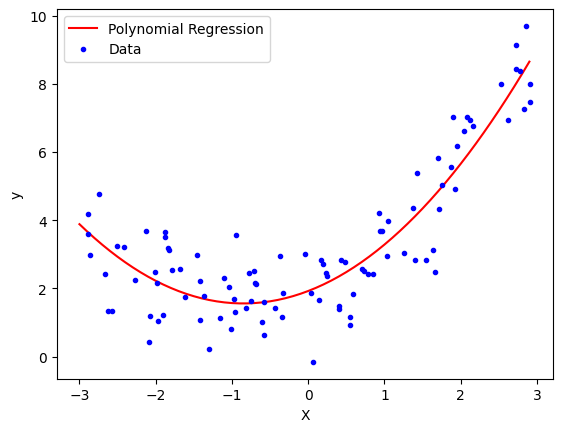

In [5]:
# Generate new input values for making predictions (range from -3 to 3 with step 0.1)
X_new = np.arange(-3, 3, 0.1)

# Compute predicted values using the trained polynomial regression model
y_lin_reg = lin_reg.coef_[0][1] * X_new**2 + lin_reg.coef_[0][0] * X_new + lin_reg.intercept_

# Plot the polynomial regression curve
plt.plot(X_new, y_lin_reg, "r-", label="Polynomial Regression")

# Plot the original data points
plt.plot(X, y, "b.", label="Data")

# Label the axes
plt.xlabel('X')
plt.ylabel('y')

# Add a legend for clarity
plt.legend()

# Display the plot
plt.show()